In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import numpy as np

In [2]:
import zipfile 
zip_ref=zipfile.ZipFile("archive (2).zip","r")
zip_ref.extractall()
zip_ref.close()

In [3]:
import tensorflow as tf
test_dir=r"C:\Users\shree\Downloads\DEEP LEARNING\dataset"

In [4]:
import os
print(os.listdir(r"C:\Users\shree\Downloads\DEEP LEARNING\dataset"))

['alien_test', 'cloudy', 'foggy', 'rainy', 'shine', 'sunrise', 'test.csv']


In [5]:
import tensorflow.keras as keras
train=keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)


Found 1530 files belonging to 6 classes.


In [6]:
for images,labels in train.take(1):
    print(images.shape)
    print(labels.shape)

(32, 256, 256, 3)
(32,)


In [7]:
def process(image,label):
    image=image=255
    return image,label
train=train.map(process)
train
images
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([5, 3, 5, 1, 1, 1, 2, 3, 1, 2, 5, 0, 3, 2, 1, 2, 1, 4, 5, 2, 1, 3,
       5, 3, 3, 5, 4, 3, 4, 2, 4, 5], dtype=int32)>

In [28]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3))),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(64,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(128,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(180,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Flatten()),
model.add(Dense(512,activation='relu'))
model.add(Dense(7,activation='softmax'))


c:\Users\shree\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
evl=model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [26]:
x=np.array(images)
y=np.array(labels)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
y_train.shape
x_train.shape
y_test.shape

(25, 256, 256, 3)


(7,)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
early_stop=EarlyStopping(monitor='accuracy',patience=10,restore_best_weights=True)

In [30]:
history=model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 35.3539 - val_accuracy: 0.1429 - val_loss: 347.6635
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step - accuracy: 0.2400 - loss: 198.4166 - val_accuracy: 0.0000e+00 - val_loss: 681.2596
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step - accuracy: 0.2800 - loss: 680.5982 - val_accuracy: 0.1429 - val_loss: 251.8268
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step - accuracy: 0.2400 - loss: 352.8954 - val_accuracy: 0.2857 - val_loss: 32.9861
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step - accuracy: 0.2800 - loss: 82.2852 - val_accuracy: 0.4286 - val_loss: 7.9183
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step - accuracy: 0.2400 - loss: 19.2872 - val_accuracy: 0.0000e+00 - val_loss: 39.7646
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step - accuracy: 0.3200 - loss: 22.0641 - val_accuracy: 0.1429 - val_loss: 41.2894
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step - accuracy: 0.4000 - loss: 31.2485 - val

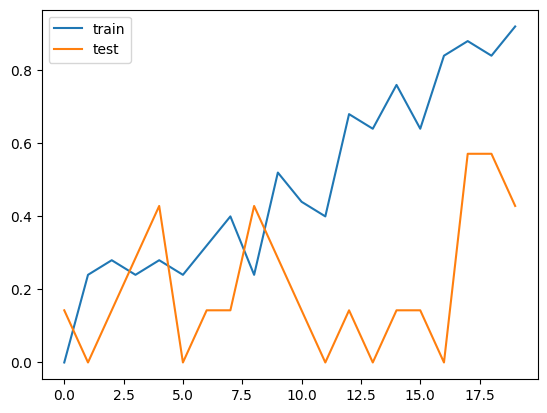

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

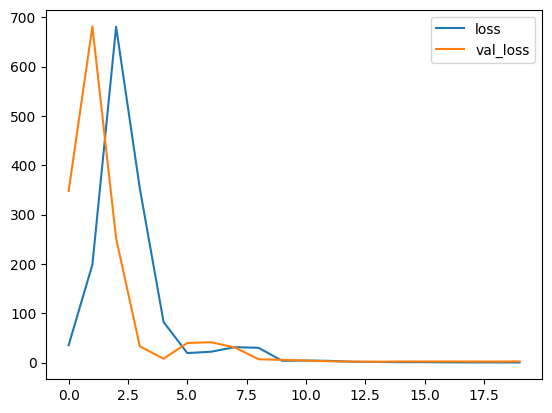

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [35]:
# ==============================
# 🎯 Make Predictions
# ==============================
import tensorflow as tf
from tensorflow.keras.preprocessing import image

img_height = 256
img_width = 256

class_names = ['alien_test', 'cloudy', 'foggy', 'rainy', 'shine', 'sunrise', 'test.csv']

img_path = r"C:\Users\shree\Downloads\DEEP LEARNING\foggy image.jpg"  # Change image path
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("Predicted emotion:", class_names[np.argmax(score)])
print("Confidence: {:.2f}%".format(100 *np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted emotion: rainy
Confidence: 17.51%
